In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
import numpy as np

In [3]:
# CSVs from Resources Folder
file_one = "Resources\Data1.csv"
file_two = "Resources\Data2.csv"

In [4]:
# Reading Data from CSV files
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [5]:
# Combine and create dataframe with 'date' attribute
file_one_df["DATE"]=file_two_df["DATE"]
file_one_df.head()


,Temperature,Revenue,DATE
0,24.566884,534.799028,01/01/1972
1,26.005191,625.190122,01/02/1972
2,27.790554,660.632289,01/03/1972
3,20.595335,487.706960,01/04/1972
4,11.503498,316.240194,01/05/1972


In [6]:
# Combine and create dataframe with 'value' attribute
file_one_df["value"]=file_two_df["value"]
file_one_df.head()

,Temperature,Revenue,DATE,value
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [7]:
# Create one combined dataframe
data=file_one_df

In [8]:
#Renaming Columns
final_data=data.rename(columns={"DATE": "Date", "value": "Consumption"})

In [9]:
# Final dataframe
final_data.head()

,Temperature,Revenue,Date,Consumption
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [10]:
min_rev=data['Revenue'].min()
min_rev

10.0

In [11]:
max_rev=data['Revenue'].max()
max_rev

1000.0

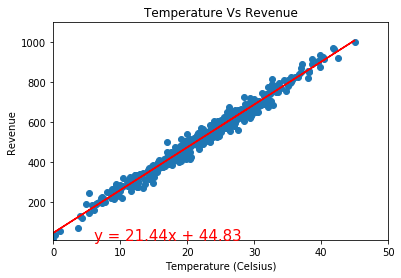

In [12]:
# Adding the linear regression equation and plotting Temperature and Revenue data
x_axis=final_data.Temperature
y_axis=final_data.Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Revenue")
plt.title("Temperature Vs Revenue")
plt.xlim(0,50)
plt.ylim(10,1100)
plt.show()

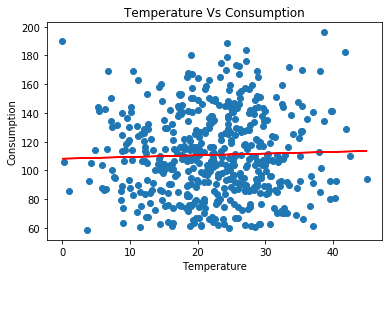

In [13]:
# Adding the linear regression equation and plotting Temperature and Consumption data
x_axis=final_data.Temperature
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature")
plt.ylabel("Consumption")
plt.title("Temperature Vs Consumption")
plt.show()

In [14]:
# Adding new 'month column' to the final dataframe
final_data['Month']=final_data['Date'].str.split('/').str[1].astype(int)
final_data.head()

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5


In [15]:
# Final dataframe with 'month' column
final_data.head()

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5


In [16]:
# Temperature statistics
final_data['Temperature'].describe()

count    500.000000
mean      22.232225
std        8.096388
min        0.000000
25%       17.122258
50%       22.392791
75%       27.740674
max       45.000000
Name: Temperature, dtype: float64

In [17]:
# Consumption statistics
final_data['Consumption'].describe()

count    500.000000
mean     110.824557
std       29.221577
min       58.659800
25%       88.511975
50%      107.865950
75%      131.557275
max      196.173700
Name: Consumption, dtype: float64

In [18]:
# Revenue statistics
final_data['Revenue'].describe()

count     500.000000
mean      521.570777
std       175.404751
min        10.000000
25%       405.558681
50%       529.368565
75%       642.257922
max      1000.000000
Name: Revenue, dtype: float64

([<matplotlib.axis.XTick at 0x1c3dc87ec48>,
 <a list of 13 Text xticklabel objects>)

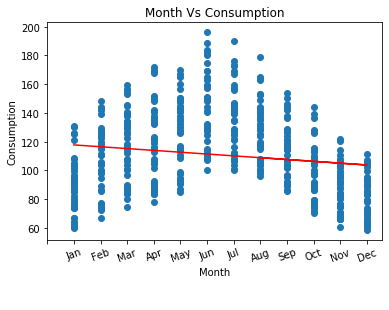

In [19]:
# Adding the linear regression equation and plotting Month and Consumption data
x_axis=final_data.Month
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Month")
plt.ylabel("Consumption")
plt.title("Month Vs Consumption")
plt.xticks(np.arange(13),("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"), rotation=20)


Random Forest Regression
------------------------------------------

In [39]:
# Data preview
final_data.head(10)

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5
5,14.352514,367.940744,01/06/1972,100.5960,6
6,13.707780,308.894518,01/07/1972,100.1263,7
7,30.833985,696.716640,01/08/1972,96.3607,8
8,0.976870,55.390338,01/09/1972,85.8007,9
9,31.669465,737.800824,01/10/1972,70.3934,10


In [40]:
# Assigning X and y values
X = final_data['Temperature'].values
y = final_data['Revenue'].values

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [42]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\shweta shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [44]:
# Predicting the Results
y_prediction_results = regressor.predict(X_test.reshape(-1,1))
y_prediction_results

array([617.79246024, 257.07543638, 559.05578797, 581.00031804,
       500.56619105, 522.4585999 , 652.86056426, 440.07072761,
       287.16916719, 456.61802918, 664.80702618, 597.0682738 ,
       345.73185162, 543.77063752, 453.64696658, 205.8503057 ,
       446.40440926, 576.03824109, 202.57278448, 345.73185162,
       943.8805163 , 519.69040713, 893.88309329, 808.3765712 ,
       335.29278984, 657.36125226, 452.74216383, 676.77575291,
       650.98323897, 799.61462108, 311.42449352, 371.79437172,
       546.4036776 , 300.32110506, 332.75658245, 679.75232945,
       274.27946718, 590.92883178, 513.43529292, 323.94682925,
       642.47060567, 476.41663165, 640.15547381, 596.95119451,
       497.89653192, 775.1856964 , 202.57278448, 353.77352817,
       652.86056426, 789.51922819, 308.8956284 , 450.9041121 ,
       462.92272562, 633.53048161, 450.17044406, 946.53981445,
       441.54959062, 296.21179915, 380.8191108 , 653.99074654,
       761.96489089, 529.4612223 , 799.61462108, 395.20

In [45]:
# Comparing the Real Values with Predicted Values
Comparison_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
Comparison_df


,Real Values,Predicted Values
0,599.116360,617.792460
1,276.373374,257.075436
2,569.618756,559.055788
3,591.173390,581.000318
4,488.170809,500.566191
...,...,...
245,759.377432,743.878430
246,420.966453,457.092432
247,526.547065,595.700362
248,405.661446,414.229866


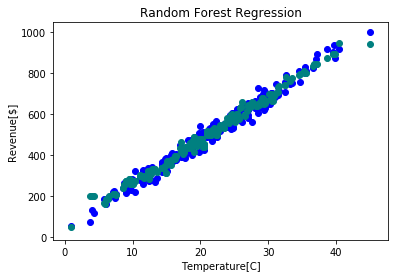

In [48]:
# Visualising the Random Forest Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_prediction_results, color = 'teal')
plt.title('Random Forest Regression')
plt.xlabel('Temperature[C]')
plt.ylabel('Revenue[$]')
plt.show()

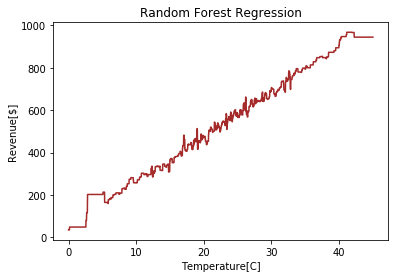

In [49]:
# Visualising the Random Forest Regression Results
plt.plot(X_grid, regressor.predict(X_grid), color = 'brown')
plt.title('Random Forest Regression')
plt.xlabel('Temperature[C]')
plt.ylabel('Revenue[$]')
plt.show()

In [50]:
# Predicting revenue at a given temperature
Temperature = 20
Revenue = regressor.predict([[Temperature]])
Revenue

array([472.58378255])

Keras Regression
----------------------------

In [51]:
# Import libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [52]:
# Assigning X and y values
X_train = final_data['Temperature']
y_train = final_data['Revenue']

In [53]:
# Create a sequential model
model = Sequential()
model.add(Dense(units = 1, input_shape = [1]))

In [54]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Complile the model
model.compile(optimizer=Adam(0.1), loss = 'mean_squared_error')

In [56]:
# Fit (train) the model
epochs = model.fit(X_train, y_train, epochs = 800)

Epoch 1/800
16/16 [==============================] - 0s 998us/step - loss: 272937.5000
Epoch 2/800
16/16 [==============================] - 0s 873us/step - loss: 234059.3125
Epoch 3/800
16/16 [==============================] - 0s 997us/step - loss: 198879.4062
Epoch 4/800
16/16 [==============================] - 0s 935us/step - loss: 167888.0156
Epoch 5/800
16/16 [==============================] - 0s 1ms/step - loss: 141085.6406
Epoch 6/800
16/16 [==============================] - 0s 1ms/step - loss: 117290.5547
Epoch 7/800
16/16 [==============================] - 0s 997us/step - loss: 96873.6094
Epoch 8/800
16/16 [==============================] - 0s 686us/step - loss: 79481.3516
Epoch 9/800
16/16 [==============================] - 0s 748us/step - loss: 64803.6250
Epoch 10/800
16/16 [==============================] - 0s 873us/step - loss: 52340.9141
Epoch 11/800
16/16 [==============================] - 0s 1ms/step - loss: 41916.9609
Epoch 12/800
16/16 [==============================] 

16/16 [==============================] - 0s 623us/step - loss: 671.8667
Epoch 98/800
16/16 [==============================] - 0s 1ms/step - loss: 672.3104
Epoch 99/800
16/16 [==============================] - 0s 1ms/step - loss: 671.7623
Epoch 100/800
16/16 [==============================] - 0s 686us/step - loss: 671.2368
Epoch 101/800
16/16 [==============================] - 0s 686us/step - loss: 671.0246
Epoch 102/800
16/16 [==============================] - 0s 623us/step - loss: 670.6585
Epoch 103/800
16/16 [==============================] - 0s 686us/step - loss: 670.5858
Epoch 104/800
16/16 [==============================] - 0s 748us/step - loss: 670.2393
Epoch 105/800
16/16 [==============================] - 0s 623us/step - loss: 670.2625
Epoch 106/800
16/16 [==============================] - 0s 561us/step - loss: 670.0565
Epoch 107/800
16/16 [==============================] - 0s 748us/step - loss: 669.5093
Epoch 108/800
16/16 [==============================] - 0s 686us/step - los

16/16 [==============================] - 0s 561us/step - loss: 629.4963
Epoch 288/800
16/16 [==============================] - 0s 686us/step - loss: 629.5578
Epoch 289/800
16/16 [==============================] - 0s 623us/step - loss: 630.2395
Epoch 290/800
16/16 [==============================] - 0s 623us/step - loss: 628.8804
Epoch 291/800
16/16 [==============================] - 0s 686us/step - loss: 631.5364
Epoch 292/800
16/16 [==============================] - 0s 686us/step - loss: 629.0977
Epoch 293/800
16/16 [==============================] - 0s 686us/step - loss: 629.6859
Epoch 294/800
16/16 [==============================] - 0s 748us/step - loss: 630.9503
Epoch 295/800
16/16 [==============================] - 0s 623us/step - loss: 628.9575
Epoch 296/800
16/16 [==============================] - 0s 810us/step - loss: 631.1542
Epoch 297/800
16/16 [==============================] - 0s 623us/step - loss: 629.3392
Epoch 298/800
16/16 [==============================] - 0s 748us/step

16/16 [==============================] - 0s 686us/step - loss: 625.8838
Epoch 477/800
16/16 [==============================] - 0s 748us/step - loss: 627.2083
Epoch 478/800
16/16 [==============================] - 0s 748us/step - loss: 625.6654
Epoch 479/800
16/16 [==============================] - 0s 561us/step - loss: 635.3774
Epoch 480/800
16/16 [==============================] - 0s 686us/step - loss: 635.0790
Epoch 481/800
16/16 [==============================] - 0s 686us/step - loss: 627.0237
Epoch 482/800
16/16 [==============================] - 0s 686us/step - loss: 628.8248
Epoch 483/800
16/16 [==============================] - 0s 686us/step - loss: 625.5472
Epoch 484/800
16/16 [==============================] - 0s 748us/step - loss: 625.7605
Epoch 485/800
16/16 [==============================] - 0s 623us/step - loss: 624.2987
Epoch 486/800
16/16 [==============================] - 0s 623us/step - loss: 629.2663
Epoch 487/800
16/16 [==============================] - 0s 686us/step

16/16 [==============================] - 0s 623us/step - loss: 627.5677
Epoch 667/800
16/16 [==============================] - 0s 810us/step - loss: 625.0668
Epoch 668/800
16/16 [==============================] - 0s 623us/step - loss: 639.1773
Epoch 669/800
16/16 [==============================] - 0s 561us/step - loss: 632.6147
Epoch 670/800
16/16 [==============================] - 0s 623us/step - loss: 625.0247
Epoch 671/800
16/16 [==============================] - 0s 623us/step - loss: 630.0446
Epoch 672/800
16/16 [==============================] - 0s 623us/step - loss: 625.0059
Epoch 673/800
16/16 [==============================] - 0s 686us/step - loss: 629.1678
Epoch 674/800
16/16 [==============================] - 0s 623us/step - loss: 628.9872
Epoch 675/800
16/16 [==============================] - 0s 748us/step - loss: 626.8864
Epoch 676/800
16/16 [==============================] - 0s 997us/step - loss: 626.3882
Epoch 677/800
16/16 [==============================] - 0s 1ms/step -

In [57]:
epochs.history.keys()

dict_keys(['loss'])

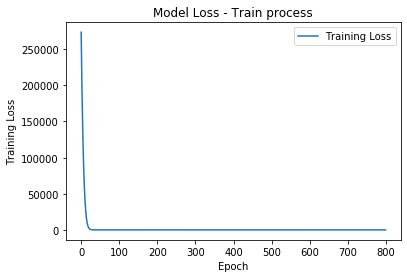

In [58]:
# Evaluate the model
plt.plot(epochs.history['loss'])
plt.title('Model Loss - Train process')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [59]:
model.get_weights()

[array([[21.328737]], dtype=float32), array([44.648045], dtype=float32)]

Text(0.5, 1.0, 'Revenue vs Temperature')

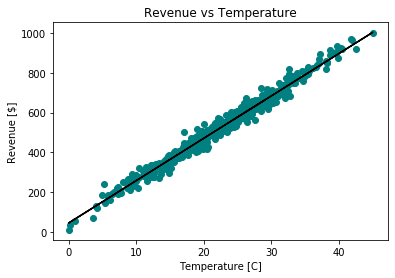

In [60]:
# Making Predictions with trained data
plt.scatter(X_train, y_train, color = 'teal')
plt.plot(X_train, model.predict(X_train), color = 'black')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [C]')
plt.title('Revenue vs Temperature')

In [61]:
# Predicting revenue at a given temperature
Temperature = 20
Revenue = model.predict([Temperature])
print('Revenue Prediction using Trained Data =', Revenue)

Revenue Prediction using Trained Data = [[471.22278]]


Conclusions
--------------------
1. Model:
The predictive models have yielded comparable results- 

At a given temperature[e.g. 20 degC]

Random Forest Regression Results -([472.58378255])

Keras Regression Results - [[471.22278]]

----------------------------------------------------------------------------------------------------------------------

2. Revenue and Temperature: 
As per our graphs, Revenue and Temperature are very strongly positive correlated.

----------------------------------------------------------------------------------------------------------------------

3. Temperature and Consumption: 

(a)Summer months [June - August] -  Highest Consumption

(b)Winter months [December - February] - Lowest Consumption

----------------------------------------------------------------------------------------------------------------------

4. Next Steps

-Business Considerations

-Follow up studies

----------------------------------------------------------------------------------------------------------------------

5. Limitations and Further Investigation

-Month VS Revenue

-First five years VS Middle five years VS Last five years